## Gather

In [1]:
import pandas as pd
import requests
import os
import json
import tweepy
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
# Read given csv file:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Download image prediction file from given url:
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [4]:
# Read image prediction tsv file:
df_predict = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
# Intering API Keys, Secrets, and Tokens for twitter development account:
api_key = '**********************'
api_secret_key = '*********************************'
access_token = '**************-*******************'
access_token_secret = '********************************'

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [6]:
# Using tweet id from df_archive dataframe to get tweet JSON data by Tweeby to access Twitter API:
# Making dictionery for invalid tweets:
tweet_error = {}
# Making JSON file to store tweets info. line by line
if not os.path.isfile('tweet_json.txt'):
    # Calculate time for quering the tweets
    start = timer()
    with open('tweet_json.txt', 'w') as file:
        for id in (df_archive['tweet_id']):
            try:
                tweet = api.get_status(id,tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
                print(id, ': success')
                json.dump(tweet._json, file)
                file.write('\n') 
            except tweepy.TweepError as e:
                tweet_error[id] = e
                print(id,': fail')
                pass
    end = timer()
    print('time_elapsed = ', end - start, 'sec' )

In [7]:
# Reading lines of tweet_json file
with open('tweet_json.txt','r') as file:
    lines=file.readlines()

In [8]:
# Making dictionary for ('tweet_id', 'retweet_count', 'favorite_count')
df_list = []
for line in lines:
    res = json.loads(line)
    tweet_id = res['id']
    retweet_count = res['retweet_count']
    favorite_count = res['favorite_count']
    df_list.append({'tweet_id' :tweet_id ,
                       'retweet_count' : retweet_count,
                       'favorite_count' : favorite_count})
    

In [9]:
# Making dataframe for extracted info from JSON file
df_api = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [10]:
# No. of invalid tweets
len(tweet_error)

0

## Assess

In [11]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
df_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669564461...,10,10,a,None,None,None,None
1798,677228873407442944,NaN,NaN,2015-12-16 20:48:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chuq. He just wants to fit in. 11...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677228873...,11,10,Chuq,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1557,688804835492233216,NaN,NaN,2016-01-17 19:27:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688804835...,12,10,None,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god it's Narcos but Barkos. 13/10 someon...,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feat...,13,10,None,None,None,None,None
381,827324948884643840,NaN,NaN,2017-02-03 01:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphie. He's being treated for an ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827324948...,12,10,Ralphie,None,None,None,None
84,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,None,None,None,None
2057,671355857343524864,NaN,NaN,2015-11-30 15:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lou. He's a Petrarch Sunni Pinto. Well...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671355857...,10,10,Lou,None,None,None,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Tess         1
Duchess      1
Raphael      1
Kulet        1
Stella       1
Name: name, Length: 957, dtype: int64

In [18]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
df_predict.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1335,758041019896193024,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,bookshop,0.794272,False,Cardigan,0.051265,True,Bernese_mountain_dog,0.026596,True
1294,751830394383790080,https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg,1,chow,0.703569,True,Pomeranian,0.076637,True,Siamese_cat,0.045959,False
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1141,729838605770891264,https://pbs.twimg.com/ext_tw_video_thumb/72983...,1,stone_wall,0.758218,False,patio,0.074205,False,prison,0.013826,False
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098752,False,fountain,0.031755,False
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074820,True


In [20]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7456,35299
1,892177421306343426,5535,30573
2,891815181378084864,3661,23005
3,891689557279858688,7626,38615
4,891327558926688256,8227,36890
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,124,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


In [23]:
df_api.sample(25)

,tweet_id,retweet_count,favorite_count
631,792913359805018113,3939,14241
664,788552643979468800,7099,0
38,884876753390489601,4931,25507
1314,705066031337840642,597,2125
1767,677334615166730240,269,1286
1882,674447403907457024,336,1006
1908,674019345211760640,285,1065
2087,670435821946826752,476,996
1145,720785406564900865,739,3011
298,835264098648616962,1641,7577


In [24]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [25]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.00000,2331.000000
mean,7.419079e+17,2619.58816,7381.763621
std,6.823170e+16,4431.93056,11464.763627
min,6.660209e+17,1.00000,0.000000
25%,6.782670e+17,530.50000,1283.000000
50%,7.182469e+17,1222.00000,3201.000000
75%,7.986692e+17,3043.00000,9031.500000
max,8.924206e+17,75264.00000,152212.000000


#### Quality
`df_archive` columns:
- **name**: Missing values, wrong extracted values (a, an) and Nan data represented as string data ‘none’.
- **dog stages coloumns**: Missing values, some dog stages written abbreviated (floof) and Nan data represented as string data ‘none’.
- **timestamp**: timestamp represented as object.
- **rating_numerator, rating_denominator**: Wrong extracted values.
- Some tweets don’t have images.
- There are some not original tweets ratings(retweets, replies).
- There are some columns not important in our wrangling.
- No. of rows not identical with other dataframes (some tweets have insufficient info. in other dataframes)

`df_predic` columns:
- There are wrong predictions (false) in all predection levels.
- Nondescriptive column headers (p1, p1_conf, p1_dog, .....)
- No. of rows not identical with other dataframes.

`df_api` columns:
- No. of rows not identical with other dataframes (some tweets have insufficient info. in other dataframes)

#### Tidiness

`df_archive` columns:
- **text**: Two variables in one column (text and tweet's url)
- Column headers are values, not variable names (doggo, floofer, pupper, puppo).

`df_predic` columns:
- Column headers are values, not variable names (p1, p1_conf, p1_dog, .....)

`df_api` columns:
- Same type of observational unit for df_archive datafram, (Each type of observational unit forms a table)

## Clean

In [26]:
# Making copy from dataframes
df_archive_clean = df_archive.copy()
df_predict_clean = df_predict.copy()
df_api_clean = df_api.copy()

#### There are some not original tweets ratings(retweets, replies).
##### Define
Remove retweets and replies by using is null function

#### Code

In [27]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]
df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_status_id'].isnull()]

##### Test

In [28]:
df_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.097000e+03,0.0,0.0,0.0,0.0,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,12.189318,10.448736
std,6.710178e+16,NaN,NaN,NaN,NaN,40.364996,6.645061
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


#### Some tweets don’t have images..
##### Define
Remove tweets without image by using drop function

#### Code

In [29]:
# Determine tweets don't have image
df_archive_clean[df_archive_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
707,785515384317313025,NaN,NaN,2016-10-10 16:20:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [30]:
# Drop tweeets without images by row index
df_archive_clean = df_archive_clean.drop([375, 707, 1445])

##### Test

In [31]:
df_archive_clean[df_archive_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### There are some columns not important in our wrangling.
##### Define
Remove unnecessary columns by using drop function

##### Code


In [32]:
# Drop columns for retweets and replies
df_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis =1,inplace = True)

##### Test

In [33]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### No. of rows not identical with other dataframes (some tweets have insufficient info. in other dataframes)
##### Define
Matching tweets in archive dataframe with tweets in prediction dataframe using merge function

##### Code


In [34]:
id_tweets = df_predict_clean[['tweet_id']]

In [35]:
df_archive_clean = pd.merge(df_archive_clean, id_tweets , on = ['tweet_id'])

##### Test

In [36]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
1966,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
1967,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
1968,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
1969,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Column headers are values, not variable names (doggo, floofer, pupper, puppo).
####  dog stages coloumns: Missing values, some dog stages written abbreviated (floof) and Nan data represented as string data ‘none’.
##### Define
Making one column for dog stages values using addition columns

##### Code

In [37]:
# Making copy from text column lower case to ease extracting dog stage
df_archive_clean.text_copy = df_archive_clean.text.str.lower()

<ipython-input-37-d3fd051ef475>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_archive_clean.text_copy = df_archive_clean.text.str.lower()


In [38]:
df_archive_clean.text_copy

0       this is phineas. he's a mystical boy. only eve...
1       this is tilly. she's just checking pup on you....
2       this is archie. he is a rare norwegian pouncin...
3       this is darla. she commenced a snooze mid meal...
4       this is franklin. he would like you to stop ca...
                              ...                        
1966    here we have a 1949 1st generation vulpix. enj...
1967    this is a purebred piers morgan. loves to netf...
1968    here is a very happy pup. big fan of well-main...
1969    this is a western brown mitsubishi terrier. up...
1970    here we have a japanese irish setter. lost eye...
Name: text, Length: 1971, dtype: object

In [39]:
df_archive_clean['doggo'] = df_archive_clean.text_copy.str.extract(r'(doggos?)')
df_archive_clean['floofer'] = df_archive_clean.text_copy.str.extract(r'(floofe?r?s?)')
df_archive_clean['pupper'] = df_archive_clean.text_copy.str.extract(r'(puppers?)')
df_archive_clean['puppo'] = df_archive_clean.text_copy.str.extract(r'(puppos?)')

In [40]:
# changing null value to "" to ease merging columns
df_archive_clean.doggo.replace(np.nan, '', inplace=True)
df_archive_clean.floofer.replace(np.nan, '', inplace=True)
df_archive_clean.pupper.replace(np.nan, '', inplace=True)
df_archive_clean.puppo.replace(np.nan, '', inplace=True)

In [41]:
# merge into column
df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']

In [42]:
df_archive_clean.dog_stage.value_counts()

                1606
pupper           203
doggo             61
puppo             26
floof             26
puppers           21
doggopupper        8
doggos             6
floofer            6
doggopuppo         2
floofs             2
doggofloof         1
floofepupper       1
doggofloofer       1
puppos             1
Name: dog_stage, dtype: int64

In [44]:
# Fixing dog stage values after re-assessment
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('floofepupper', 'pupper')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('doggos', 'doggo')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('floof', 'floofer')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('floofs', 'floofer')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('puppers', 'pupper')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('doggofloof', 'doggofloofer')
df_archive_clean.dog_stage = df_archive_clean.dog_stage.replace('puppos',np.nan)

In [45]:
# Fixing dog stage multiple values after re-assessment
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [46]:
# drop unnecessary columns
df_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [47]:
# changing missing values to null values
df_archive_clean.loc[df_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

##### Test

In [48]:
df_archive_clean.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [49]:
df_archive_clean.dog_stage.value_counts()

pupper            225
doggo              67
floofer            34
puppo              26
doggo, pupper       8
doggo, puppo        2
doggo, floofer      2
Name: dog_stage, dtype: int64

#### Name column: Missing values, wrong extracted values (a, an) and Nan data represented as string data ‘none’.
##### Define
- Re_extract names using REGEX rules and string slicing
- By extracting from text the 'none' string values will transfer to Null values (Nan)

##### Code

In [50]:
df_archive_clean.name = df_archive_clean.text.str.extract(r'(named\s[A-Z]\w+|is\s[A-Z]\w+|Meet\s[A-Z]\w+|to\s[A-Z]\w+)')
df_archive_clean.name = df_archive_clean.name.str.split().str[-1]

##### Test

In [51]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1399 non-null   object
 8   dog_stage           364 non-null    object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


In [52]:
df_archive_clean.name.value_counts()

Charlie     11
Oliver      11
Lucy        10
Cooper      10
Penny        9
            ..
Kallie       1
Crumpet      1
Philbert     1
River        1
Stella       1
Name: name, Length: 954, dtype: int64

#### rating_numerator, rating_denominator: Wrong extracted values.
##### Define
Re_extract names using REGEX rules

##### Code

In [53]:
df_archive_clean['rating_numerator'] = df_archive_clean.text.str.extract('(\d+\.?\d?\d?)/\d{1,3}').astype(float)
df_archive_clean['rating_denominator'] = df_archive_clean.text.str.extract('\d+\.?\d?\d?/(\d{1,3})').astype(float)

##### Test

In [54]:
df_archive_clean[df_archive_clean['rating_numerator'] == 13.5]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
39,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,NaN


In [55]:
df_archive_clean.rating_numerator.value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

In [56]:
df_archive_clean.rating_denominator.value_counts()

10.0     1954
50.0        3
80.0        2
11.0        2
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [57]:
# Fixing rating_numerator, rating_denominator values after re-assessment
df_archive_clean.iloc[382]

tweet_id                                             810984652412424192
timestamp                                     2016-12-19 23:06:23 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  Meet Sam. She smiles 24/7 &amp; secretly aspir...
expanded_urls         https://www.gofundme.com/sams-smile,https://tw...
rating_numerator                                                     24
rating_denominator                                                    7
name                                                                Sam
dog_stage                                                           NaN
Name: 382, dtype: object

In [58]:
df_archive_clean['rating_numerator'].iloc[382] = np.nan
df_archive_clean['rating_denominator'].iloc[382] = np.nan

C:\Users\h_k_h\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [59]:
df_archive_clean.iloc[794]

tweet_id                                             740373189193256964
timestamp                                     2016-06-08 02:41:38 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  After so many requests, this is Bretagne. She ...
expanded_urls         https://twitter.com/dog_rates/status/740373189...
rating_numerator                                                      9
rating_denominator                                                   11
name                                                           Bretagne
dog_stage                                                           NaN
Name: 794, dtype: object

In [60]:
# The corret ratings
df_archive_clean['rating_numerator'].iloc[794] = 14
df_archive_clean['rating_denominator'].iloc[794] = 10

In [61]:
df_archive_clean.iloc[884]

tweet_id                                             722974582966214656
timestamp                                     2016-04-21 02:25:47 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  Happy 4/20 from the squad! 13/10 for all https...
expanded_urls         https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                      4
rating_denominator                                                   20
name                                                                NaN
dog_stage                                                           NaN
Name: 884, dtype: object

In [62]:
# The corret ratings
df_archive_clean['rating_numerator'].iloc[884] = 13
df_archive_clean['rating_denominator'].iloc[884] = 10

In [63]:
df_archive_clean.iloc[918]

tweet_id                                             716439118184652801
timestamp                                     2016-04-03 01:36:11 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Bluebert. He just saw that both #Final...
expanded_urls         https://twitter.com/dog_rates/status/716439118...
rating_numerator                                                     50
rating_denominator                                                   50
name                                                           Bluebert
dog_stage                                                           NaN
Name: 918, dtype: object

In [64]:
# The corret ratings
df_archive_clean['rating_numerator'].iloc[918] = 11
df_archive_clean['rating_denominator'].iloc[918] = 10

In [65]:
df_archive_clean.iloc[1313]

tweet_id                                             682962037429899265
timestamp                                     2016-01-01 16:30:13 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  This is Darrel. He just robbed a 7/11 and is i...
expanded_urls         https://twitter.com/dog_rates/status/682962037...
rating_numerator                                                      7
rating_denominator                                                   11
name                                                             Darrel
dog_stage                                                           NaN
Name: 1313, dtype: object

In [66]:
# The corret ratings
df_archive_clean['rating_numerator'].iloc[1313] = 10
df_archive_clean['rating_denominator'].iloc[1313] = 10

In [67]:
df_archive_clean.iloc[1950]

tweet_id                                             666287406224695296
timestamp                                     2015-11-16 16:11:11 +0000
source                <a href="http://twitter.com/download/iphone" r...
text                  This is an Albanian 3 1/2 legged  Episcopalian...
expanded_urls         https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                      1
rating_denominator                                                    2
name                                                                NaN
dog_stage                                                           NaN
Name: 1950, dtype: object

In [68]:
# The corret ratings
df_archive_clean['rating_numerator'].iloc[1950] = 9
df_archive_clean['rating_denominator'].iloc[1950] = 10

#### timestamp: timestamp represented as object.
##### Define
Change data type from object to date by to datetime function

##### Code

In [69]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

##### Test

In [70]:
df_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                          object
dtype: object

#### text column: Two variables in one column (text and tweet's url)
##### Define
Extract url by rsplit function

##### Code

In [71]:
df_archive_clean['text'], df_archive_clean['url'] = df_archive_clean['text'].str.rsplit(' ',1).str

<ipython-input-71-5abcea532fa9>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_archive_clean['text'], df_archive_clean['url'] = df_archive_clean['text'].str.rsplit(' ',1).str


##### Test

In [72]:
df_archive_clean.url.sample(20)

662     https://t.co/TdyGTcX0uo
1190    https://t.co/qOD4G19A2u
856     https://t.co/5i8fORVKgr
1928    https://t.co/tI3uFLDHBI
1745    https://t.co/MAZx8MPF0S
1418    https://t.co/lWL2IMJqLR
1950    https://t.co/d9NcXFKwLv
1228    https://t.co/o4Nfc8WoAO
734     https://t.co/vdr7DaRSa7
1900    https://t.co/QCugm5ydl6
780     https://t.co/hBTzPmj36Z
516     https://t.co/s8W8Del9HQ
16      https://t.co/chxruIOUJN
1471    https://t.co/B3xxSLjQSH
439     https://t.co/6hx7ur6sNI
1463    https://t.co/dB0H9hdZai
786     https://t.co/rYxJ0UQtbE
1451    https://t.co/aqBHjjh5VD
1629    https://t.co/ZICNl6tIr5
1690    https://t.co/ycVJyFFkES
Name: url, dtype: object

In [73]:
# there are duplicate columns url column and expand url column, we can drop one of them
df_archive_clean.drop('url',axis=1,inplace=True)

In [74]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### df_api dataframe : Same type of observational unit for df_archive datafram, (Each type of observational unit forms a table)
#### No. of rows not identical with other dataframes (some tweets have insufficient info. in other dataframes)
##### Define
Merging df_archive_clean with df_api_clean to make one dataframe and remove tweets don't have suffecient info.

##### Code

In [75]:
df_api_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7456,35299
1,892177421306343426,5535,30573
2,891815181378084864,3661,23005
3,891689557279858688,7626,38615
4,891327558926688256,8227,36890
...,...,...,...
2326,666049248165822465,39,95
2327,666044226329800704,124,263
2328,666033412701032449,39,108
2329,666029285002620928,41,118


In [76]:
df_archive_clean = pd.merge(df_api_clean, df_archive_clean, on = ['tweet_id'])

##### Test

In [77]:
df_archive_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'timestamp', 'source',
       'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
       'name', 'dog_stage'],
      dtype='object')

In [78]:
df_archive_clean

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,7456,35299,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN
1,892177421306343426,5535,30573,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN
2,891815181378084864,3661,23005,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN
3,891689557279858688,7626,38615,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN
4,891327558926688256,8227,36890,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1959,666049248165822465,39,95,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,NaN
1960,666044226329800704,124,263,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10.0,Netflix,NaN
1961,666033412701032449,39,108,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10.0,NaN,NaN
1962,666029285002620928,41,118,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN


In [79]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1964 non-null   int64              
 1   retweet_count       1964 non-null   int64              
 2   favorite_count      1964 non-null   int64              
 3   timestamp           1964 non-null   datetime64[ns, UTC]
 4   source              1964 non-null   object             
 5   text                1964 non-null   object             
 6   expanded_urls       1964 non-null   object             
 7   rating_numerator    1963 non-null   float64            
 8   rating_denominator  1963 non-null   float64            
 9   name                1392 non-null   object             
 10  dog_stage           363 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 184.1+ KB


#### df_predict dataframe Nondescriptive column headers (p1, p1_conf, p1_dog, .....)
##### Define
Changing columns' names for non Nondescriptive columns using rename function

##### Code

In [80]:
df_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [81]:
df_predict_clean = df_predict_clean.rename(columns = {'p1': 'breed_1', 'p1_conf': 'confidence_1', 'p1_dog' : 'predection_1', 'p2': 'breed_2', 'p2_conf': 'confidence_2', 'p2_dog' : 'predection_2', 'p3': 'breed_3', 'p3_conf': 'confidence_3', 'p3_dog' : 'predection_3'}, inplace = False)

##### Test

In [82]:
df_predict_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'breed_1', 'confidence_1',
       'predection_1', 'breed_2', 'confidence_2', 'predection_2', 'breed_3',
       'confidence_3', 'predection_3'],
      dtype='object')

In [83]:
df_predict_clean

,tweet_id,jpg_url,img_num,breed_1,confidence_1,predection_1,breed_2,confidence_2,predection_2,breed_3,confidence_3,predection_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### df_predict dataframe column headers are values, not variable names (p1, p1_conf, p1_dog, .....)
##### Define
Making one column for breed, one for prediction and one for confidence ratio using wide to long function


##### Code

In [84]:
df_predict_clean = pd.wide_to_long(df_predict_clean, stubnames=['breed', 'confidence', 'predection'], i=['tweet_id', 'jpg_url','img_num'], j='prediction_level', sep = '_').reset_index()

##### Test

In [85]:
df_predict_clean

,tweet_id,jpg_url,img_num,prediction_level,breed,confidence,predection
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
...,...,...,...,...,...,...,...
6220,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
6221,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
6222,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
6223,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False


In [86]:
df_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          6225 non-null   int64  
 1   jpg_url           6225 non-null   object 
 2   img_num           6225 non-null   int64  
 3   prediction_level  6225 non-null   int64  
 4   breed             6225 non-null   object 
 5   confidence        6225 non-null   float64
 6   predection        6225 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


In [87]:
sum(df_predict_clean.duplicated())

0

## There is no duplicated rows

In [88]:
# Making Master dataframe by merging df_archive_clean and df_predict_clean and matching tweets
df_master = pd.merge(df_archive_clean, df_predict_clean, on = ['tweet_id'])

In [89]:
df_master

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prediction_level,breed,confidence,predection
0,892420643555336193,7456,35299,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892420643555336193,7456,35299,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False
2,892420643555336193,7456,35299,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,3,banana,0.076110,False
3,892177421306343426,5535,30573,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
4,892177421306343426,5535,30573,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,666029285002620928,41,118,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5888,666029285002620928,41,118,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
5889,666020888022790149,447,2357,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
5890,666020888022790149,447,2357,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8.0,10.0,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True


In [90]:
sum(df_master.duplicated())

0

### There is no duplicated rows

In [91]:
df_master.to_csv('twitter_archive_master.csv', index = False)

In [92]:
# Making dataframes for three true leve prediction 
df_true = df_master[df_master['predection'] == True]
df_true_1 = df_true[df_true['prediction_level']==1]
df_true_2 = df_true[df_true['prediction_level']==2]
df_true_3 = df_true[df_true['prediction_level']==3]

<ipython-input-93-46a247768cc8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = df_true_1.groupby(['breed'])['retweet_count','favorite_count'].sum().sort_values(['favorite_count','retweet_count'], ascending = False)[12::-1]


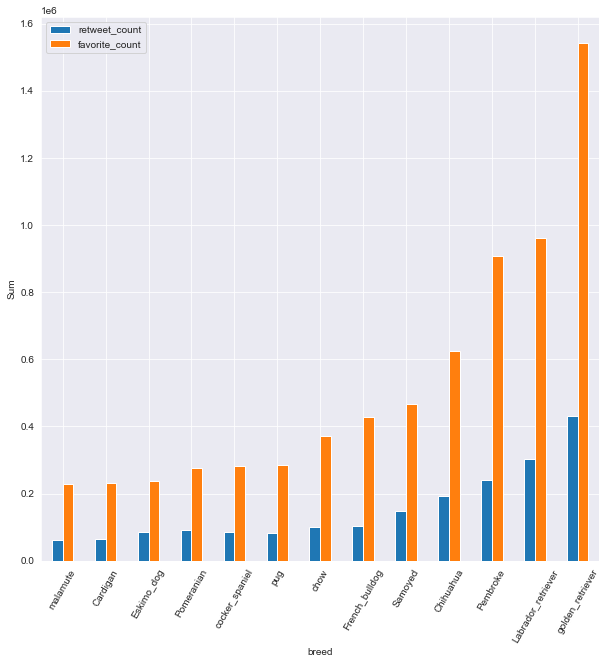

In [93]:
# plot relation between sum of retweet_count and favorite_count for highst dog breeds for prediction level 1
df_sum = df_true_1.groupby(['breed'])['retweet_count','favorite_count'].sum().sort_values(['favorite_count','retweet_count'], ascending = False)[12::-1]
chart = df_sum.plot(kind = 'bar', figsize=(10,10));
plt.rc('xtick', labelsize = 15)
plt.xticks(rotation=60)
plt.rc('ytick', labelsize = 15) 
plt.rc('axes', labelsize = 15)
chart.set_xlabel("breed")
chart.set_ylabel("Sum");

<ipython-input-94-2008e623d204>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_true_1.groupby(['breed'])['retweet_count','favorite_count'].mean().sort_values(['favorite_count','retweet_count'], ascending = False)[12::-1]


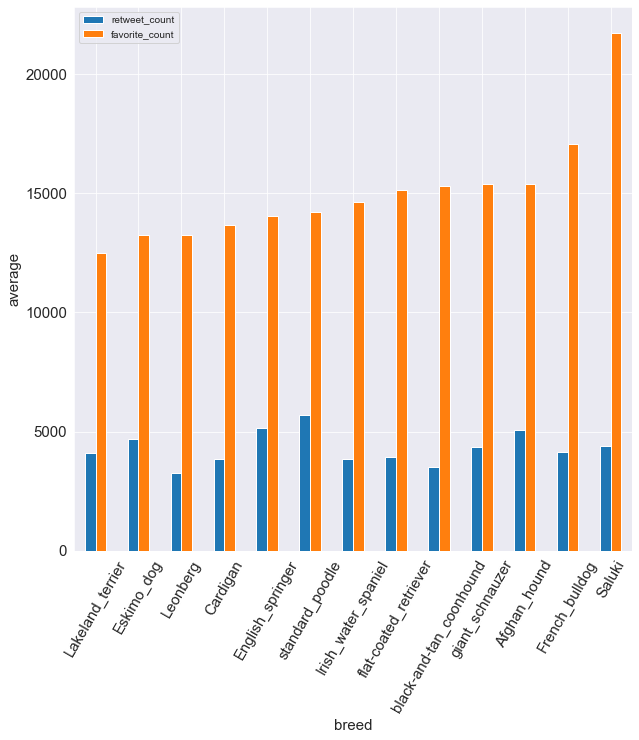

In [94]:
# plot relation between average of retweet_count and favorite_count for highst dog breeds for prediction level 1
df_mean = df_true_1.groupby(['breed'])['retweet_count','favorite_count'].mean().sort_values(['favorite_count','retweet_count'], ascending = False)[12::-1]
chart = df_mean.plot(kind = 'bar', figsize = (10,10));
plt.rc('xtick', labelsize = 10)
plt.xticks(rotation=60)
plt.rc('ytick', labelsize = 10) 
plt.rc('axes', labelsize = 10)
chart.set_xlabel("breed")
chart.set_ylabel("average");

<ipython-input-95-23c20ce272ee>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chart1 = df_archive_clean.groupby(['dog_stage'])['retweet_count','favorite_count'].mean().plot(kind = 'bar',color = ('r','b'),figsize = (8,8));


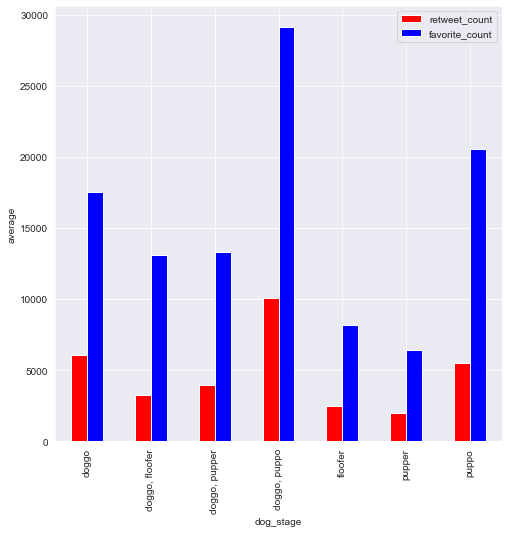

In [95]:
# plot relation between average retweet_count and favorite_count with four dog stages
chart1 = df_archive_clean.groupby(['dog_stage'])['retweet_count','favorite_count'].mean().plot(kind = 'bar',color = ('r','b'),figsize = (8,8));
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('axes', labelsize = 10)
chart1.set_ylabel("average");

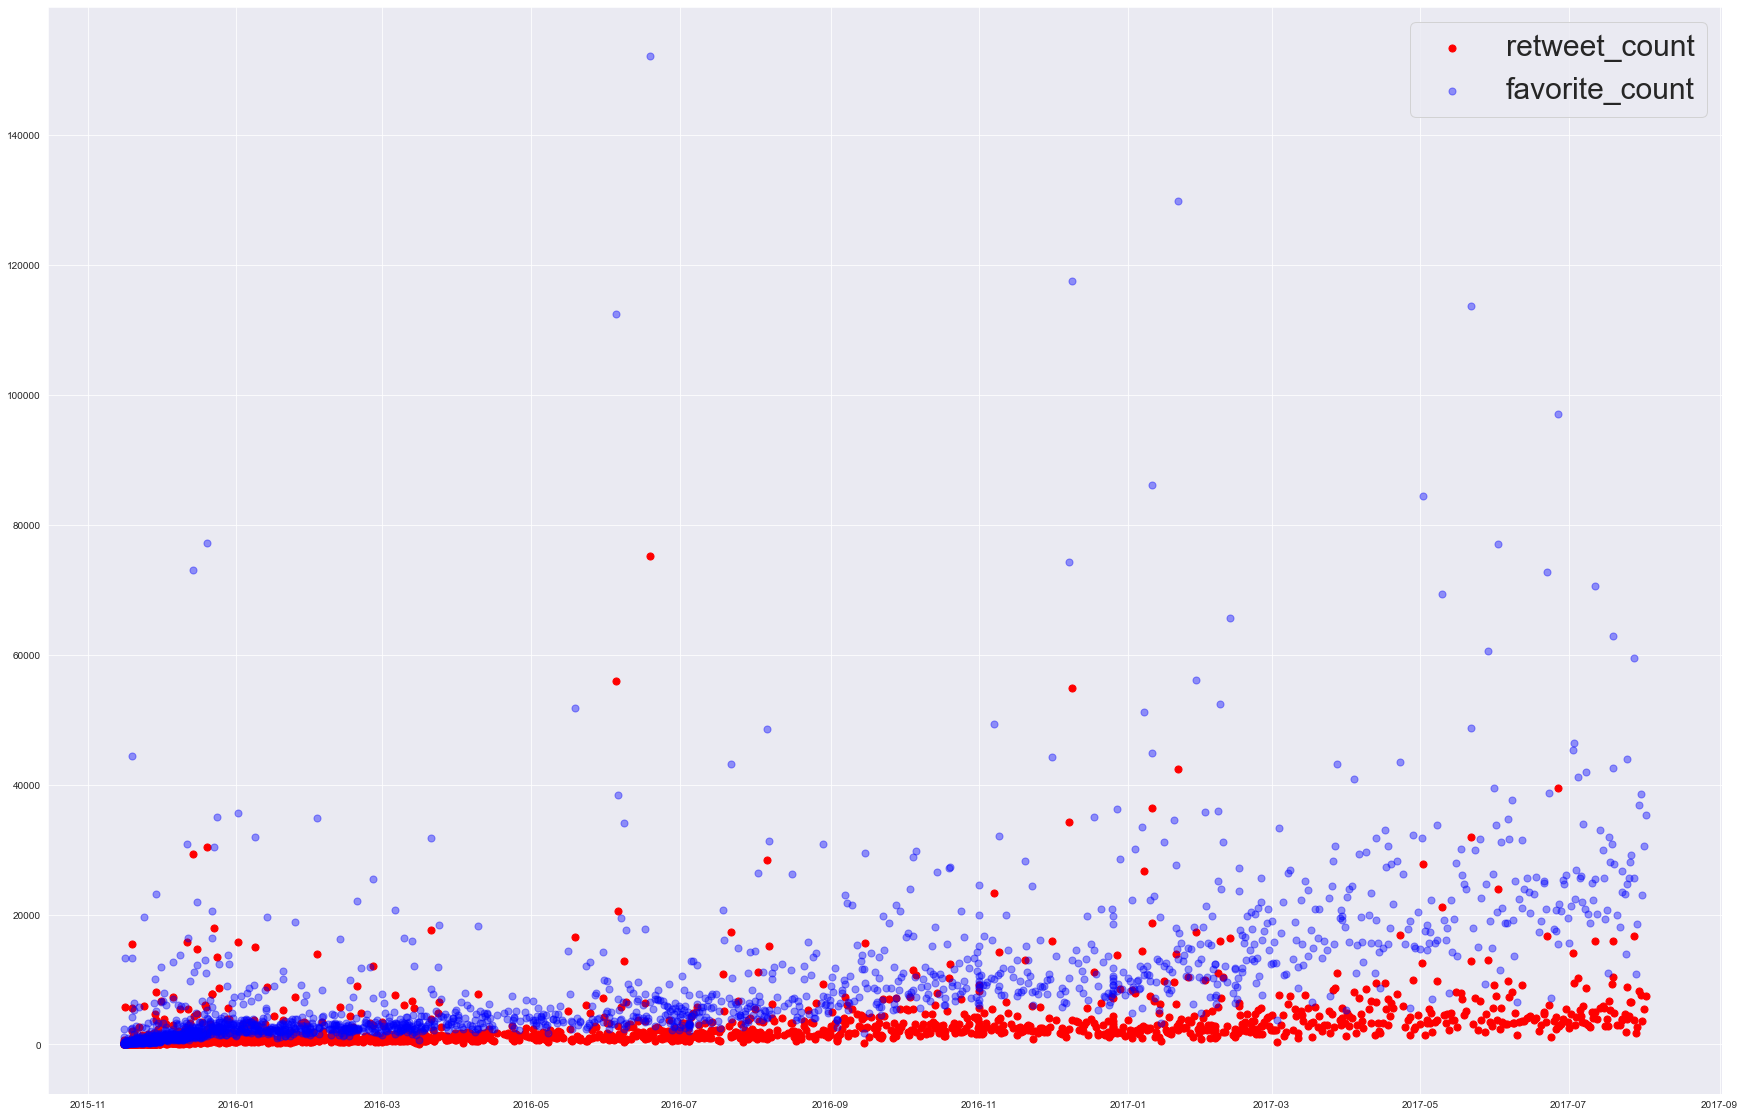

In [96]:
# Plot the relation between retweet_count, favorite_count with time
fig, ax = plt.subplots(figsize = (30,20))
ax.scatter(df_archive_clean['timestamp'], df_archive_clean['retweet_count'], c ='r', label = 'retweet_count',s = 50);
ax.scatter(df_archive_clean['timestamp'], df_archive_clean['favorite_count'], c ='b', label = 'favorite_count',s = 50, alpha = .4);
ax.legend(loc = 1, prop = {'size': 30});